https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

UNICEF_data = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/UNICEF/UNICEF_result.pdf")



In [4]:
UNICEF_data.lower()

"www.thelancet.com/lancetgh \n  vol 7   july 2019\n e849national, regional, and worldwide estimates of low \nbirthweight in 2015, with trends from 2000: a systematic \n\nanalysishannah blencowe, julia krasevec, mercedes de onis, robert e black, xiaoyi an, gretchen a stevens, elaine borghi, chika hayashi, diana estevez, \nluca cegolon, suhail shiekh, victoria ponce hardy, joy e lawn*, simon cousens*\nsummarybackground low birthweight (lbw) of less than 2500 g is an important marker of maternal and fetal health, predicting mortality, stunting, and adult-onset chronic conditions. global nutrition targets set at the world health assembly in \n2012 include an ambitious 30% reduction in lbw prevalence between 2012 and 2025. estimates to track progress \ntowards this target are lacking; with this analysis, we aim to assist in setting a baseline against which to assess \nprogress towards the achievement of the world health assembly targets.\nmethods we sought to identify all available lbw inpu

In [6]:
type(UNICEF_data)

str

In [7]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [8]:
type(UNICEF_data)

str

In [9]:
Sent = nltk.word_tokenize(UNICEF_data)
print(nltk.pos_tag(Sent))

[('www.thelancet.com/lancetgh', 'NN'), ('Vol', 'NNP'), ('7', 'CD'), ('July', 'NNP'), ('2019', 'CD'), ('e849National', 'NN'), (',', ','), ('regional', 'JJ'), (',', ','), ('and', 'CC'), ('worldwide', 'JJ'), ('estimates', 'NNS'), ('of', 'IN'), ('low', 'JJ'), ('birthweight', 'NN'), ('in', 'IN'), ('2015', 'CD'), (',', ','), ('with', 'IN'), ('trends', 'NNS'), ('from', 'IN'), ('2000', 'CD'), (':', ':'), ('a', 'DT'), ('systematic', 'JJ'), ('analysisHannah', 'NN'), ('Blencowe', 'NNP'), (',', ','), ('Julia', 'NNP'), ('Krasevec', 'NNP'), (',', ','), ('Mercedes', 'NNP'), ('de', 'FW'), ('Onis', 'NNP'), (',', ','), ('Robert', 'NNP'), ('E', 'NNP'), ('Black', 'NNP'), (',', ','), ('Xiaoyi', 'NNP'), ('An', 'DT'), (',', ','), ('Gretchen', 'NNP'), ('A', 'NNP'), ('Stevens', 'NNP'), (',', ','), ('Elaine', 'NNP'), ('Borghi', 'NNP'), (',', ','), ('Chika', 'NNP'), ('Hayashi', 'NNP'), (',', ','), ('Diana', 'NNP'), ('Estevez', 'NNP'), (',', ','), ('Luca', 'NNP'), ('Cegolon', 'NNP'), (',', ','), ('Suhail', 'NNP')

In [10]:
sent1 = nltk.pos_tag(Sent)

In [11]:
sent1[:30]

[('www.thelancet.com/lancetgh', 'NN'),
 ('Vol', 'NNP'),
 ('7', 'CD'),
 ('July', 'NNP'),
 ('2019', 'CD'),
 ('e849National', 'NN'),
 (',', ','),
 ('regional', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('worldwide', 'JJ'),
 ('estimates', 'NNS'),
 ('of', 'IN'),
 ('low', 'JJ'),
 ('birthweight', 'NN'),
 ('in', 'IN'),
 ('2015', 'CD'),
 (',', ','),
 ('with', 'IN'),
 ('trends', 'NNS'),
 ('from', 'IN'),
 ('2000', 'CD'),
 (':', ':'),
 ('a', 'DT'),
 ('systematic', 'JJ'),
 ('analysisHannah', 'NN'),
 ('Blencowe', 'NNP'),
 (',', ','),
 ('Julia', 'NNP'),
 ('Krasevec', 'NNP')]

In [12]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [13]:
nouns

['www.thelancet.com/lancetgh',
 'e849National',
 'estimates',
 'birthweight',
 'trends',
 'analysisHannah',
 'birthweight',
 'g',
 'marker',
 'health',
 'mortality',
 'stunting',
 'conditions',
 'nutrition',
 'targets',
 '%',
 'reduction',
 'prevalence',
 'Estimates',
 'progress',
 'target',
 'analysis',
 'baseline',
 'progress',
 'achievement',
 'targets',
 'input',
 'data',
 'livebirths',
 'years',
 'datasets',
 'inclusion',
 'information',
 'birthweight',
 'prevalence',
 'livebirths',
 'method',
 'survey',
 'adjustment',
 'countries',
 'quality',
 'time-series',
 'data',
 'trends',
 'data',
 'use',
 'regression',
 'countries',
 'prevalence',
 'trends',
 'use',
 'maximum',
 'likelihood',
 'approach',
 'random',
 'e˜ects',
 'Uncertainty',
 'ranges',
 'bootstrapping',
 'Results',
 'level',
 'country-years',
 'birthweight',
 'data',
 'births',
 'countries',
 'member',
 'states',
 'countries',
 'data',
 'meeting',
 'inclusion',
 'criteria',
 'worldwide',
 'prevalence',
 '%',
 'uncertaint

In [14]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['www.thelancet.com/lancetgh', 'e849National', 'estimates', 'birthweight', 'trends', 'analysisHannah', 'birthweight', 'g', 'marker', 'health', 'mortality', 'stunting', 'conditions', 'nutrition', 'targets', 'reduction', 'prevalence', 'Estimates', 'progress', 'target', 'analysis', 'baseline', 'progress', 'achievement', 'targets', 'input', 'data', 'livebirths', 'years', 'datasets', 'inclusion', 'information', 'birthweight', 'prevalence', 'livebirths', 'method', 'survey', 'adjustment', 'countries', 'quality', 'time-series', 'data', 'trends', 'data', 'use', 'regression', 'countries', 'prevalence', 'trends', 'use', 'maximum', 'likelihood', 'approach', 'random', 'e˜ects', 'Uncertainty', 'ranges', 'bootstrapping', 'Results', 'level', 'country-years', 'birthweight', 'data', 'births', 'countries', 'member', 'states', 'countries', 'data', 'meeting', 'inclusion', 'criteria', 'worldwide', 'prevalence', 'uncertainty', 'range', 'reduction', 'rate', 'livebirths', 'income', 'countries', 'estimates', 'p

In [14]:
from nltk import ngrams
#from nltk import bigrams, trigrams

In [15]:
#bigram=list(ngrams(tokens_without_sw,2))

In [16]:
#bigram

In [17]:
#trigram=list(ngrams(tokens_without_sw,3))

In [18]:
#trigram

In [19]:
#bigrams_trigrams = bigram + trigram
#print(bigrams_trigrams)

In [20]:
#type(bigrams_trigrams)

In [21]:
#bigrams_trigrams[:4]

In [22]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdowns downturns Licence designations presentation material information product expression opinion whatsoever part development status country territory city area authorities delimitation frontiers boundaries mention companies products manufacturers preference others nature designations presentation material maps expression opinion whatsoever part status country territory sea area delimitation frontiers precautions information publication material warranty kind responsibility interpretation use material reader event damages use rights work licence terms licence work purposes work use work suggestion organization products services use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation disputes licence accordance present force materials Users material work party tables figures images permission reuse permission copyright holder risk claims infr

https://www.pythonprogramming.in/generate-the-n-grams-for-the-given-sentence-using-nltk-or-textblob.html

In [23]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(listToStr, num):
    n_grams = TextBlob(listToStr).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [24]:
bigram= extract_ngrams(listToStr, 2)

In [25]:
bigram

['woman fruit',
 'fruit street',
 'street market',
 'market flagship',
 'flagship publication',
 'publication part',
 'part series',
 'series citation',
 'citation slowdowns',
 'slowdowns downturns',
 'downturns Licence',
 'Licence designations',
 'designations presentation',
 'presentation material',
 'material information',
 'information product',
 'product expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoever part',
 'part development',
 'development status',
 'status country',
 'country territory',
 'territory city',
 'city area',
 'area authorities',
 'authorities delimitation',
 'delimitation frontiers',
 'frontiers boundaries',
 'boundaries mention',
 'mention companies',
 'companies products',
 'products manufacturers',
 'manufacturers preference',
 'preference others',
 'others nature',
 'nature designations',
 'designations presentation',
 'presentation material',
 'material maps',
 'maps expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoeve

In [26]:
type(bigram)

list

In [27]:

trigram= extract_ngrams(listToStr, 3)

In [28]:
trigram

['woman fruit street',
 'fruit street market',
 'street market flagship',
 'market flagship publication',
 'flagship publication part',
 'publication part series',
 'part series citation',
 'series citation slowdowns',
 'citation slowdowns downturns',
 'slowdowns downturns Licence',
 'downturns Licence designations',
 'Licence designations presentation',
 'designations presentation material',
 'presentation material information',
 'material information product',
 'information product expression',
 'product expression opinion',
 'expression opinion whatsoever',
 'opinion whatsoever part',
 'whatsoever part development',
 'part development status',
 'development status country',
 'status country territory',
 'country territory city',
 'territory city area',
 'city area authorities',
 'area authorities delimitation',
 'authorities delimitation frontiers',
 'delimitation frontiers boundaries',
 'frontiers boundaries mention',
 'boundaries mention companies',
 'mention companies products',


In [29]:
bigrams_trigrams = bigram + trigram
print(bigrams_trigrams)

['woman fruit', 'fruit street', 'street market', 'market flagship', 'flagship publication', 'publication part', 'part series', 'series citation', 'citation slowdowns', 'slowdowns downturns', 'downturns Licence', 'Licence designations', 'designations presentation', 'presentation material', 'material information', 'information product', 'product expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part development', 'development status', 'status country', 'country territory', 'territory city', 'city area', 'area authorities', 'authorities delimitation', 'delimitation frontiers', 'frontiers boundaries', 'boundaries mention', 'mention companies', 'companies products', 'products manufacturers', 'manufacturers preference', 'preference others', 'others nature', 'nature designations', 'designations presentation', 'presentation material', 'material maps', 'maps expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part status', 'status country', 'c

In [30]:
type(bigrams_trigrams)

list

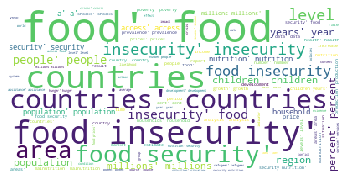

In [31]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(bigrams_trigrams))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [40]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(bigrams_trigrams)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

00  01  02  021  025  02730  028  029  03  030  ...  ﬁscoreﬂ  \
0        0   0   0    0    0      0    0    0   0    0  ...        0   
1        0   0   0    0    0      0    0    0   0    0  ...        0   
2        0   0   0    0    0      0    0    0   0    0  ...        0   
3        0   0   0    0    0      0    0    0   0    0  ...        0   
4        0   0   0    0    0      0    0    0   0    0  ...        0   
...     ..  ..  ..  ...  ...    ...  ...  ...  ..  ...  ...      ...   
115908   0   0   0    0    0      0    0    0   0    0  ...        0   
115909   0   0   0    0    0      0    0    0   0    0  ...        0   
115910   0   0   0    0    0      0    0    0   0    0  ...        0   
115911   0   0   0    0    0      0    0    0   0    0  ...        0   
115912   0   0   0    0    0      0    0    0   0    0  ...        0   

        ﬁsouthœsouth  ﬁthe  ﬁtrade  ﬁtradeﬂ  ﬁwe  ﬁzero  ﬁzeroﬂ  ﬂany  ﬂfigure  
0                  0     0       0        0    0      0       0     0        0  
1                  0     0       0        0    0      0       0     0        0  
2                  0     0       0        0    0      0       0     0        0  
3                  0     0       0        0    0      0       0     0        0  
4                  0     0       0        0    0      0       0     0        0  
...              ...   ...     ...      ...  ...    ...     ...   ...      ...  
115908             0     0       0        0    0      0       0     0        0  
115909             0     0       0        0    0      0       0     0        0  
115910             0     0       0        0    0      0       0     0        0  
115911             0     0       0        0    0      0       0     0        0  
115912             0     0       0        0    0      0       0     0        0  

[115913 rows x 4876 columns]

In [33]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
people malnutrition areas poverty nutrition levels assistance insecurity food income
Topic 1:
countries percent years number millions shocks refugees production growth cont
Topic 2:
food children insecurity access population analysis prices security households cent


In [34]:
import pyLDAvis.sklearn


In [35]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
2      -632.045471 -384.325073       1        1  34.571367
1     -1209.665405  212.164124       2        1  32.847839
0     -1437.453247 -586.322510       3        1  32.580794, topic_info=     Category          Freq        Term         Total  loglift  logprob
2000  Default  12522.000000        food  12522.000000  30.0000  30.0000
1214  Default   5407.000000   countries   5407.000000  29.0000  29.0000
3259  Default   3292.000000      people   3292.000000  28.0000  28.0000
931   Default   2965.000000    children   2965.000000  27.0000  27.0000
3273  Default   2633.000000     percent   2633.000000  26.0000  26.0000
...       ...           ...         ...           ...      ...      ...
1259   Topic3    875.756813     country   2246.905776   0.1792  -4.6965
2000   Topic3   1296.171005        food  12522.352711  -1.1467  -4.3044
2155   Topic3    674.509097      growth   1813.371317   0.1325  -4.9576
1214   Topic3    808.408431   countries   5407.231600  -0.7790  -4.7765
3448   Topic3    578.144730  prevalence   1561.701091   0.1277  -5.1117

[204 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
332       1  0.992882  acceptance
332       2  0.002387  acceptance
332       3  0.002387  acceptance
335       1  0.995064      access
335       2  0.002523      access
...     ...       ...         ...
4788      3  0.002716        year
4790      1  0.075212       years
4790      2  0.924449       years
4844      2  0.998299       ˇoods
4844      3  0.002013       ˇoods

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])